In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

print("Path to dataset files:", path)

/Users/ihsanbolum/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Path to dataset files: /Users/ihsanbolum/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1


In [2]:
path = "/Users/ihsanbolum/.cache/kagglehub/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/versions/1"
import os
import numpy as np
import cv2
import pandas as pd
from tqdm import tqdm

In [3]:
print(f"files {os.listdir(path)}")

img_height = 32
img_width = 32
num_clases = 43

train_cvs_path = os.path.join(path, "Train.csv")
data = pd.read_csv(train_cvs_path)

print(f"{len(data)} training files")

imgs = []
labels = []

files ['Test', 'Test.csv', 'Meta', 'Train', 'Meta.csv', 'Train.csv']
39209 training files


In [4]:
print(data.shape[0])

39209


In [5]:
for index, row in tqdm(data.iterrows(), total=data.shape[0]):
    img_path = os.path.join(path, row["Path"])
    img = cv2.imread(img_path)
    img = cv2.resize(img, (img_height, img_width))
    img = img / 255.0
    imgs.append(img)
    labels.append(row["ClassId"])

  0%|          | 0/39209 [00:00<?, ?it/s]

100%|██████████| 39209/39209 [00:12<00:00, 3105.94it/s]


In [6]:
x_train = np.array(imgs)
y_train = np.array(labels)

In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_val, y_train, y_val = train_test_split(
    x_train, # Ihre 100% Bilder
    y_train, # Ihre 100% Labels
    test_size=0.2,
    random_state=42,
    stratify=y_train # Stratify anhand der Original-Labels
)

print(f"x_train shape: {x_train.shape}")
print(f"x_validation shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_validation shape: {y_val.shape}")

y_train_catego = to_categorical(y_train, num_clases)
y_validation_catego = to_categorical(y_val, num_clases)

print(y_train_catego.shape)

x_train shape: (39209, 32, 32, 3)
x_validation shape: (7842, 32, 32, 3)
y_train shape: (31367,)
y_validation shape: (7842,)
(31367, 43)


In [8]:
print(f"origin label {y_train[0]}")
print(f"hot encoded version {y_train_catego[0]}")

origin label 12
hot encoded version [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3,3), activation= "relu", input_shape=(img_height,img_width, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation= "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(num_clases, activation="softmax"))

model.compile(
    optimizer = "adam",
    loss= "categorical_crossentropy",
    metrics = ["accuracy"]
)

model.summary()

/Users/ihsanbolum/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,979 (1.22 MB)

 Trainable params: 319,979 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
train_epochs = 12
history = model.fit(
    X_train,
    y_train_catego,
    epochs = 12,
    validation_data= (X_val, y_validation_catego),
    batch_size=32
)

print("finito")

Epoch 1/12
981/981 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8162 - loss: 0.5951 - val_accuracy: 0.9610 - val_loss: 0.1781
Epoch 2/12
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.8902 - loss: 0.3564 - val_accuracy: 0.9758 - val_loss: 0.1110
Epoch 3/12
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9197 - loss: 0.2515 - val_accuracy: 0.9861 - val_loss: 0.0687
Epoch 4/12
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9407 - loss: 0.1917 - val_accuracy: 0.9836 - val_loss: 0.0654
Epoch 5/12
981/981 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.9482 - loss: 0.1598 - val_accuracy: 0.9883 - val_loss: 0.0548
Epoch 6/12
981/981 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9544 - loss: 0.1452 - val_accuracy: 0.9894 - val_loss: 0.0435
Epoch 7/12
981/981 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9614 - loss: 0.1203 - val_accuracy: 0.9907 - val_loss: 0.0385
Epoch 8/12
981/981 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9667 - loss: 0.1036 - 

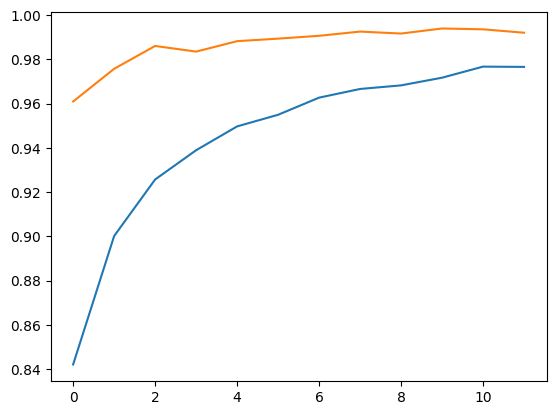

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history["val_accuracy"])



Text(0, 0.5, 'loss')

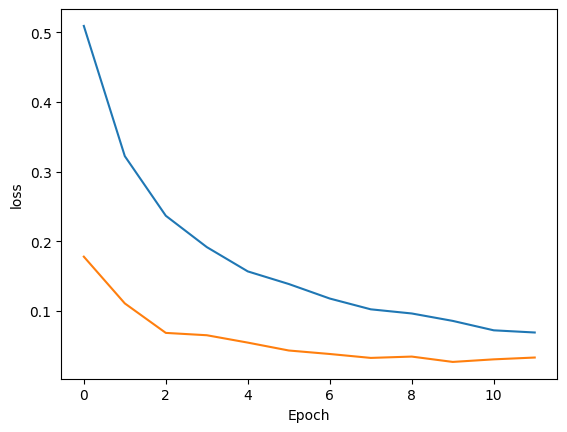

In [25]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("loss")